

-- New Fold --
Train, test and validation arrays normalized to:
[1. 1. 1.], [0.9995 0.9998 1.0011], [0.9992 0.9985 0.9994]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106410, 3, 32) 
Labels shape:  (106410,) 
Shape of test set: (21282, 3, 32) 
Shape of train set: (72358, 3, 32) 
Shape of validation set: (12770, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.19, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.23, 0.18, 0.2, 0.21, 0.16] 
Fraction of train labels:  [0.22, 0.19, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32

 Start of training model:

End of epoch 1: loss_tr=1.279, loss_val=1.275, train=50.1%, val=50.8%
End of epoch 2: loss_tr=1.134, loss_val=1.129, train=54.6%, val=55.2%
End of epoch 3: loss_tr=1.103, loss_val=1.108, train=57.6%, val=57.6%
End of epoch 4: loss_tr=1.049, loss_val=1.048, train=58.6%, val=58.6%
End of epoch 5: loss_tr=0.995, loss_val=0.997, train=61.8%, val=61.6%
End of epoch 6: loss_tr=0.972, loss_val=

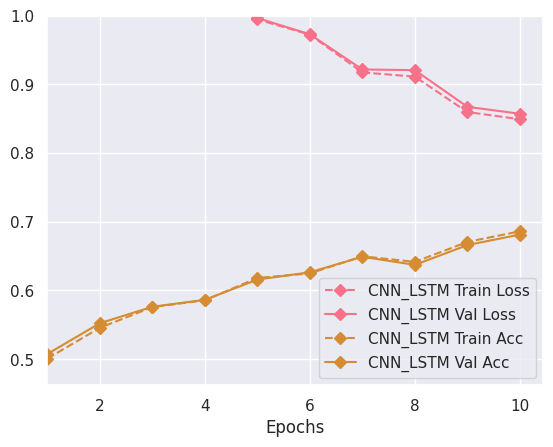

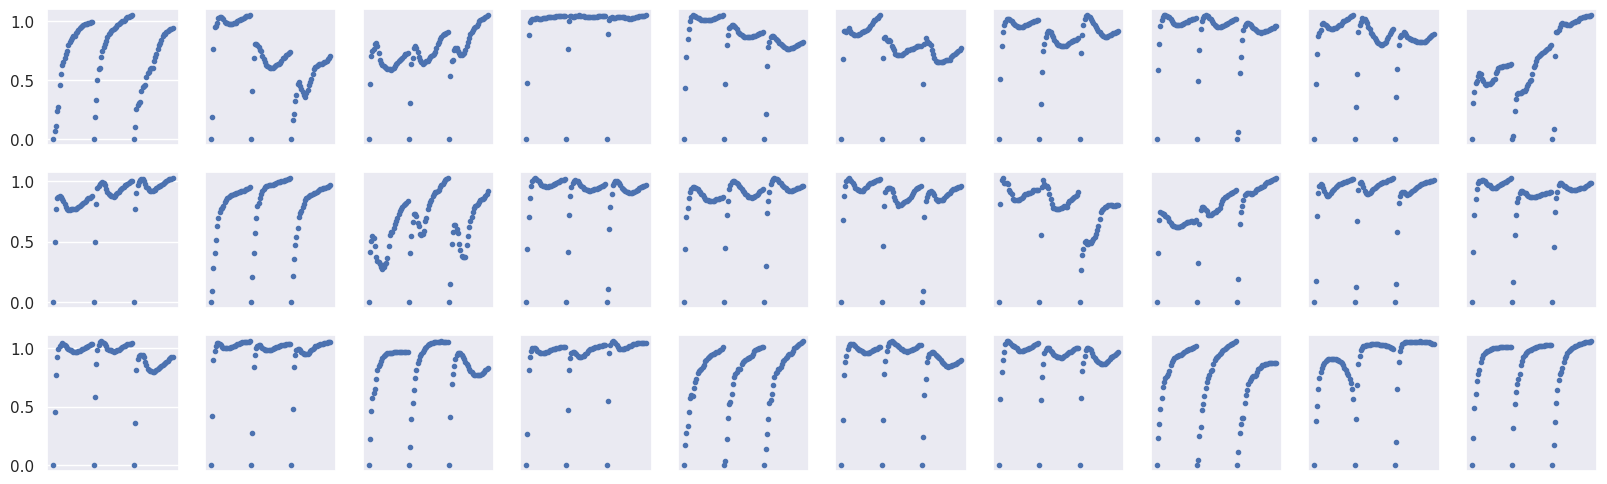

In [5]:
# Look at stardard cnn_lstm for 3 signals
from peratouch.data import Data 
from peratouch.trainer import Trainer
from peratouch.results import Results 
from peratouch.config import path_five_users_main 
from peratouch.networks import CNN_LSTM 
from peratouch.data import load_data

n_batches = 15
Xraw, yraw = load_data(path_five_users_main)
D = Data(Xraw, yraw)
D.group_presses()
D.shuffle()
# D.split()
D.make_folds(5)
D.next_fold()
D.normalize()
D.tensors_to_device()
D.print_shapes()
model = CNN_LSTM(n_ch=3) 
T = Trainer(D)
T.setup(model, batch_size=int(len(D.xtr)/n_batches), max_epochs=10, verbose=True)
T.train_model(model)
T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()

Train, test and validation arrays normalized to:
[1. 1. 1.], [0.9991 1.0002 1.0004], [1.0019 1.0013 1.0018]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (114041, 3, 32) 
Labels shape:  (114041,) 
Shape of test set: (11404, 3, 32) 
Shape of train set: (91232, 3, 32) 
Shape of validation set: (11405, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32
End of epoch 1: loss_tr=1.441, loss_val=1.442, train=38.3%, val=37.9%
End of epoch 3: loss_tr=1.245, loss_val=1.245, train=49.8%, val=49.9%
End of epoch 5: loss_tr=1.088, loss_val=1.086, train=56.0%, val=56.2%
End of epoch 7: loss_tr=0.995, loss_val=0.991, train=60.7%, val=61.1%
End of epoch 9: loss_tr=0.979, loss_val=0.973, train=61.3%, val=61.8%
End of epoch 11: loss_tr=0.931, loss_val=0.924, train=63.6%, val=64.4%
End of epoch 

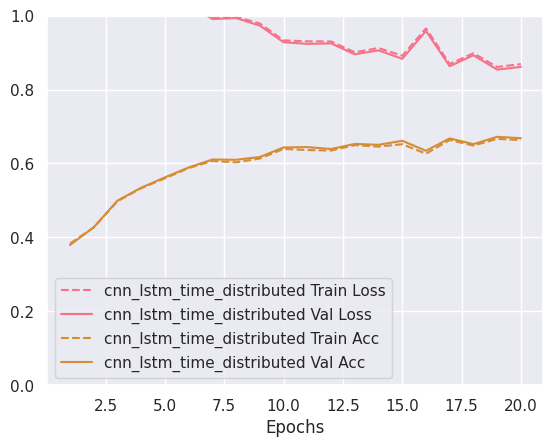

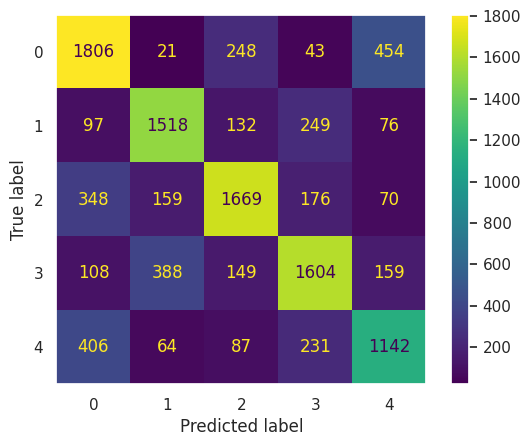

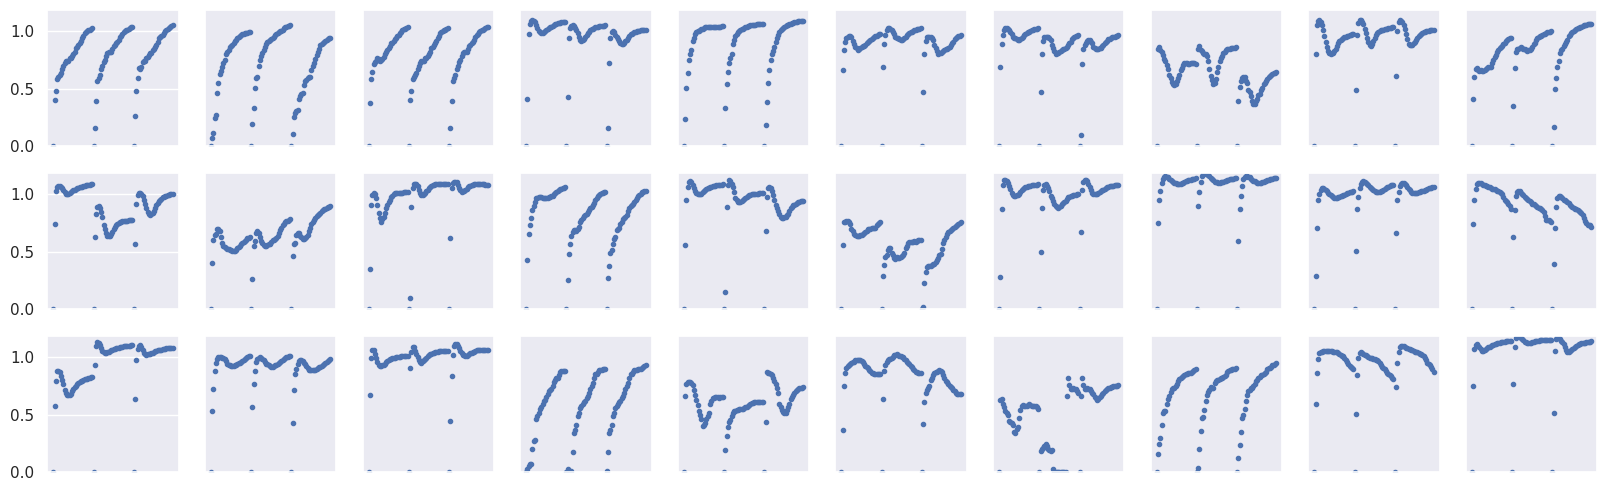

In [2]:
# # Case of time-distributed cnn-lstm 
# from peratouch.data import Data 
# from peratouch.trainer import Trainer
# from peratouch.results import Results 
# from peratouch.networks import cnn_lstm_time_distributed
# from peratouch.config import path_five_users_main 
#
# input_size = 32 
# D = Data(path_five_users_main, triggers=True, releases=False)
# D.group_presses()
# D.split()
# D.normalize()
# D.reshape_for_lstm(input_size=input_size, sliding=False)
# D.tensors_to_device()
# D.print_shapes()
# model = cnn_lstm_time_distributed(input_size=input_size, out_size=5, global_pool=False) 
# T = Trainer(D)
# T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=5000, max_epochs=20)
# T.train_model(model)
# T.plot_train()
#
# R = Results(D, model)
# R.test_metrics(report=True, conf_matrix=True)
# R.find_most_uncertain_preds()